In [21]:
# This File contains all the output of the code as GPU run time needs to be calculated.
# Taken help from https://colab.research.google.com/notebooks/gpu.ipynb#scrollTo=BlmQIFSLZDdc

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


### Enabled GPU using notebook settings in Edit menu on Colab.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving T_tr.csv to T_tr (1).csv
Saving T_ts.csv to T_ts (1).csv
Saving X_t.csv to X_t (1).csv
Saving X_tr.csv to X_tr (1).csv


In [0]:
X_tr = pd.read_csv("X_tr.csv")
X_ts = pd.read_csv("X_t.csv")
T_ts = pd.read_csv("T_ts.csv")
T_tr =  pd.read_csv("T_tr.csv")
X_train, T_train, X_test, T_test = X_tr.values, T_tr.values, X_ts.values, T_ts.values
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(categories='auto',sparse=False)
labels = onehot_encoder.fit_transform(T_tr)
labels_test = onehot_encoder.fit_transform(T_ts)
def normalize(X):
    mean = X.mean()  
    std = X.std()    
    return (X - mean) / std
X_train_normalized = normalize(X_tr)
X_test_normalized = normalize(X_ts)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from sklearn.metrics import classification_report,accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, confusion_matrix, roc_curve, auc

#Define model1
def model1():
    model1 = Sequential()

    #input layer 
    model1.add(Dense(64, activation='sigmoid', input_dim=X_train_normalized.shape[1]))
    model1.add(Dropout(0.5))

    #5 hidden layers
    model1.add(Dense(32, activation='sigmoid'))
    model1.add(Dropout(0.4))

    model1.add(Dense(64,activation='exponential'))
    model1.add(Dropout(0.5))

    model1.add(Dense(16,activation='tanh'))

    model1.add(Dense(64,activation='selu'))
    model1.add(Dropout(0.2))

    model1.add(Dense(128,activation='sigmoid'))
    model1.add(Dropout(0.3))

    #Output layer
    model1.add(Dense(2, activation='softmax'))

    #optimizer
    rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model1.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])

    #Model fitting
    history = model1.fit(X_train_normalized, labels, epochs=20, batch_size=512, verbose=1)

    #Model Evaluation
    score = model1.evaluate(X_test_normalized, labels_test, batch_size=512)

    # epoch Vs Accuracy Plot
    plt.plot(history.history['acc'])
    plt.title("Model 1 Accuracy", fontsize = 15)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    # epoch Vs Loss plot
    plt.plot(history.history['loss'])
    plt.title('Model 1 loss', fontsize = 15)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

    #Predict the values for test set
    y_pred = model1.predict_classes(X_test_normalized)

    # All evaluations
    print("\n Classification Report \n \n",classification_report(T_test,y_pred))
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred, average="macro"),3))
    
    fpr, tpr, threshold = roc_curve(T_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    #ROC Plot
    plt.title('ROC Curve for Model 1', fontsize = 15)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    
    
    # Confusion Matrix PLot
    plt.matshow(confusion_matrix(T_test, y_pred))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion matrix for Model 1', fontsize = 15)
    plt.colorbar(orientation = 'horizontal')


In [0]:
training_time_gpu = []

Epoch 1/20
32950/32950 [==============================] - 1s 42us/step - loss: 0.3927 - acc: 0.8810
Epoch 2/20
32950/32950 [==============================] - 0s 10us/step - loss: 0.3560 - acc: 0.8873
Epoch 3/20
32950/32950 [==============================] - 0s 9us/step - loss: 0.3153 - acc: 0.8866
Epoch 4/20
32950/32950 [==============================] - 0s 10us/step - loss: 0.2919 - acc: 0.8850
Epoch 5/20
32950/32950 [==============================] - 0s 10us/step - loss: 0.2776 - acc: 0.8849
Epoch 6/20
32950/32950 [==============================] - 0s 9us/step - loss: 0.2643 - acc: 0.8852
Epoch 7/20
32950/32950 [==============================] - 0s 9us/step - loss: 0.2558 - acc: 0.8920
Epoch 8/20
32950/32950 [==============================] - 0s 9us/step - loss: 0.2527 - acc: 0.8900
Epoch 9/20
32950/32950 [==============================] - 0s 10us/step - loss: 0.2405 - acc: 0.8924
Epoch 10/20
32950/32950 [==============================] - 0s 9us/step - loss: 0.2375 - acc: 0.8948
Epoc

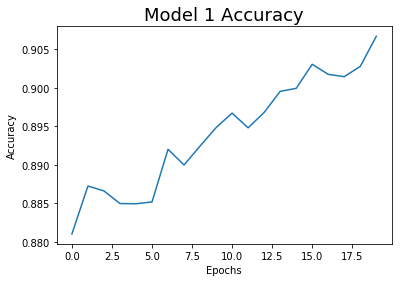

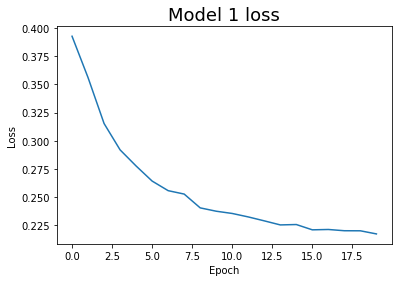


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7313
           1       0.63      0.45      0.53       925

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.78      0.71      0.74      8238
weighted avg       0.90      0.91      0.90      8238


 Confusion Matrix 
 [[7071  242]
 [ 506  419]]

 Accuracy: 90.92 %

 F1 Score:  0.739

 Precision:  0.784

 Recall:  0.71


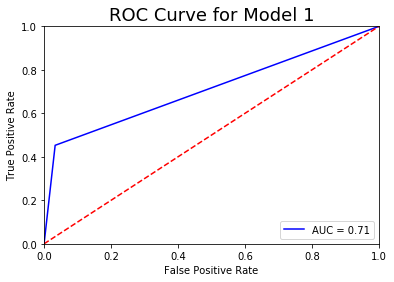

Time taken by Model 1 :  9.717464923858643 seconds


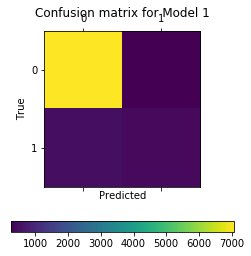

In [32]:
import time
start = time.time()
model1()
end = time.time()
print("Time taken by Model 1 : ",(end - start),"seconds")
training_time_gpu.append((end - start))

In [0]:
#Define model2
def model2():
    model2 = Sequential()

    #input layer with no. of features as input_dim and 'relu' as activation function 
    model2.add(Dense(64, activation='selu', input_dim=X_train_normalized.shape[1]))

    #adding 6 hidden layers with 64 and 32 neurons alternatively
    model2.add(Dense(32, activation='relu'))

    model2.add(Dense(64,activation='selu'))

    model2.add(Dense(32,activation='relu'))

    model2.add(Dense(64,activation='selu'))

    model2.add(Dense(32,activation='relu'))

    model2.add(Dense(64,activation='selu'))

    #Output layer 
    model2.add(Dense(2, activation='softmax'))

    #Choice of optimizer : rmsprop
    rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model2.compile(loss='binary_crossentropy', optimizer= rmsprop, metrics=['accuracy'])

    #fitting the model
    history = model2.fit(X_train_normalized, labels, epochs=20, batch_size=512, verbose=1)

    #Model Evaluation
    score_2 = model2.evaluate(X_test_normalized, labels_test, batch_size=512)

    #Plotting epoch Vs Accuracy
    plt.plot(history.history['acc'])
    plt.title("Model 2 Accuracy", fontsize = 15)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Plotting epoch Vs Loss
    plt.plot(history.history['loss'])
    plt.title('Model 2 loss', fontsize = 15)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

    #Predict the values for test set
    y_pred_2 = model2.predict_classes(X_test_normalized)

    # Evaluating Metrics
    print("\n Classification Report \n \n",classification_report(T_test,y_pred_2))
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred_2))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred_2)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred_2, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred_2, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred_2, average="macro"),3))
    
    fpr, tpr, threshold = roc_curve(T_test, y_pred_2)
    roc_auc = auc(fpr, tpr)
    
    # ROC
    plt.title('ROC Curve for Model 2', fontsize = 15)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    
    
    #Confusion matrix
    plt.matshow(confusion_matrix(T_test, y_pred_2))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion matrix for Model 2', fontsize = 15)
    plt.colorbar(orientation = 'horizontal')


Epoch 1/20
32950/32950 [==============================] - 1s 42us/step - loss: 0.2246 - acc: 0.8990
Epoch 2/20
32950/32950 [==============================] - 0s 9us/step - loss: 0.1933 - acc: 0.9098
Epoch 3/20
32950/32950 [==============================] - 0s 10us/step - loss: 0.1872 - acc: 0.9120
Epoch 4/20
32950/32950 [==============================] - 0s 9us/step - loss: 0.1833 - acc: 0.9135
Epoch 5/20
32950/32950 [==============================] - 0s 10us/step - loss: 0.1807 - acc: 0.9150
Epoch 6/20
32950/32950 [==============================] - 0s 10us/step - loss: 0.1793 - acc: 0.9151
Epoch 7/20
32950/32950 [==============================] - 0s 9us/step - loss: 0.1770 - acc: 0.9152
Epoch 8/20
32950/32950 [==============================] - 0s 9us/step - loss: 0.1756 - acc: 0.9167
Epoch 9/20
32950/32950 [==============================] - 0s 9us/step - loss: 0.1741 - acc: 0.9173
Epoch 10/20
32950/32950 [==============================] - 0s 10us/step - loss: 0.1732 - acc: 0.9174
Epoc

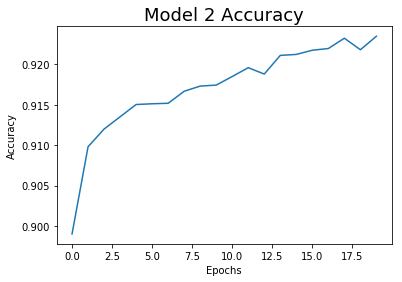

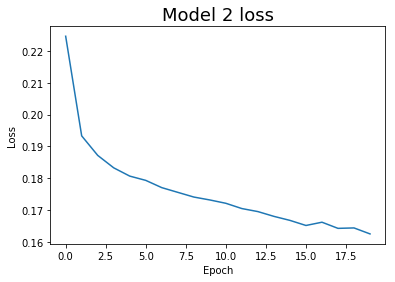


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7313
           1       0.59      0.52      0.55       925

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.77      0.74      0.75      8238
weighted avg       0.90      0.91      0.90      8238


 Confusion Matrix 
 [[6984  329]
 [ 446  479]]

 Accuracy: 90.59 %

 F1 Score:  0.75

 Precision:  0.766

 Recall:  0.736

 MCC: 0.502


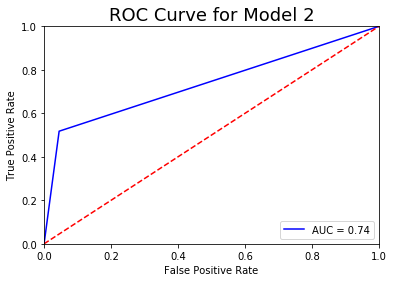

Time taken by Model 2 :  9.715609550476074 seconds


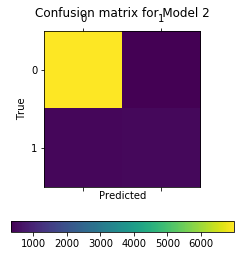

In [34]:
start = time.time()
model2()
end = time.time()
print("Time taken by Model 2 : ",(end - start),"seconds")
training_time_gpu.append((end - start))

Epoch 1/20
32950/32950 [==============================] - 3s 81us/step - loss: 0.3848 - acc: 0.8689
Epoch 2/20
32950/32950 [==============================] - 1s 21us/step - loss: 0.3389 - acc: 0.8882
Epoch 3/20
32950/32950 [==============================] - 1s 21us/step - loss: 0.3122 - acc: 0.8884
Epoch 4/20
32950/32950 [==============================] - 1s 20us/step - loss: 0.2927 - acc: 0.8888
Epoch 5/20
32950/32950 [==============================] - 1s 20us/step - loss: 0.2776 - acc: 0.8903
Epoch 6/20
32950/32950 [==============================] - 1s 21us/step - loss: 0.2738 - acc: 0.8902
Epoch 7/20
32950/32950 [==============================] - 1s 21us/step - loss: 0.2709 - acc: 0.8923
Epoch 8/20
32950/32950 [==============================] - 1s 20us/step - loss: 0.2672 - acc: 0.8936
Epoch 9/20
32950/32950 [==============================] - 1s 21us/step - loss: 0.2648 - acc: 0.8954
Epoch 10/20
32950/32950 [==============================] - 1s 20us/step - loss: 0.2632 - acc: 0.8948

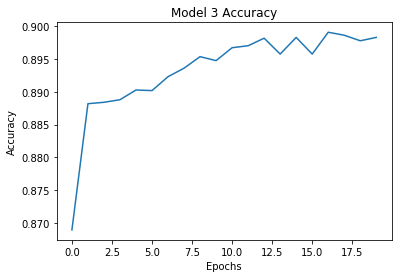

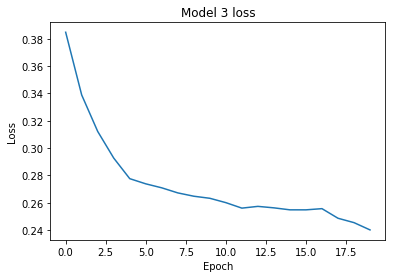

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 Classification Report 
 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      7313
           1       0.00      0.00      0.00       925

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238


 Confusion Matrix 
 [[7313    0]
 [ 925    0]]

 Accuracy: 88.77 %

 F1 Score:  0.47

 Precision:  0.444

 Recall:  0.5


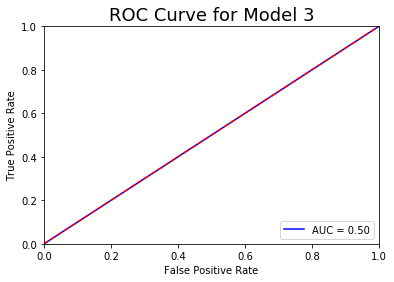

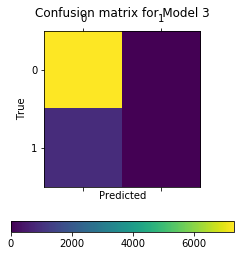

In [35]:
#Define model3
def model3():
    model3 = Sequential()
    
    # input layer
    model3.add(Dense(X_train_normalized.shape[1], activation='relu', input_dim=X_train_normalized.shape[1]))

    #adding 20 hidden layers
    model3.add(Dense(24, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(10,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(1,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(48, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(20, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(128, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(64, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(32,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(10,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(64,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(10,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(1,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(256,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(512,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(1024,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(256,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(256,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(512,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(1024,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(256,activation='selu'))
    model3.add(Dropout(0.1))
    
    #output layer
    model3.add(Dense(2, activation='softmax'))

    #Optimizing
    rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model3.compile(loss='categorical_crossentropy', optimizer= rmsprop, metrics=['accuracy'])

    #Model Fitting
    history = model3.fit(X_train_normalized, labels, epochs=20, batch_size=512, verbose=1)

    #Model Evaluation
    score_3 = model3.evaluate(X_test_normalized, labels_test, batch_size=512)

    #Epoch Vs Accuracy Plot
    plt.plot(history.history['acc'])
    plt.title("Model 3 Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Epoch vs Loss Plot
    plt.plot(history.history['loss'])
    plt.title('Model 3 loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()


    #Predicting the test values
    y_pred_3 = model3.predict_classes(X_test_normalized)

    #Classification report
    print("\n Classification Report \n \n",classification_report(T_test,y_pred_3))

    #Confusion matrix
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred_3))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred_3)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred_3, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred_3, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred_3, average="macro"),3))

    fpr, tpr, threshold = roc_curve(T_test, y_pred_3)
    roc_auc = auc(fpr, tpr)
    
    #ROC code 
    plt.title('ROC Curve for Model 3', fontsize = 18)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    
    
    plt.matshow(confusion_matrix(T_test, y_pred_3))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion matrix for Model 3', fontsize = 12)
    plt.colorbar(orientation = 'horizontal')


Epoch 1/20
32950/32950 [==============================] - 3s 99us/step - loss: 0.3982 - acc: 0.8832
Epoch 2/20
32950/32950 [==============================] - 1s 24us/step - loss: 0.3264 - acc: 0.8855
Epoch 3/20
32950/32950 [==============================] - 1s 24us/step - loss: 0.2821 - acc: 0.8871
Epoch 4/20
32950/32950 [==============================] - 1s 22us/step - loss: 0.2677 - acc: 0.8879
Epoch 5/20
32950/32950 [==============================] - 1s 21us/step - loss: 0.2582 - acc: 0.8870
Epoch 6/20
32950/32950 [==============================] - 1s 21us/step - loss: 0.2546 - acc: 0.8867
Epoch 7/20
32950/32950 [==============================] - 1s 21us/step - loss: 0.2522 - acc: 0.8887
Epoch 8/20
32950/32950 [==============================] - 1s 21us/step - loss: 0.2474 - acc: 0.8902
Epoch 9/20
32950/32950 [==============================] - 1s 21us/step - loss: 0.2452 - acc: 0.8929
Epoch 10/20
32950/32950 [==============================] - 1s 21us/step - loss: 0.2438 - acc: 0.8933

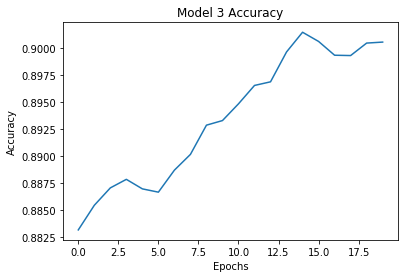

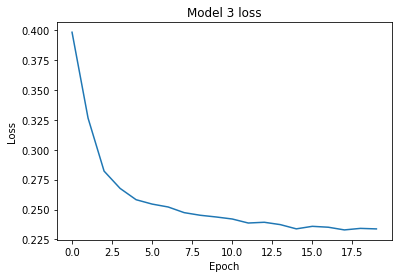


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7313
           1       0.67      0.36      0.47       925

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.80      0.67      0.71      8238
weighted avg       0.90      0.91      0.90      8238


 Confusion Matrix 
 [[7149  164]
 [ 592  333]]

 Accuracy: 90.82 %

 F1 Score:  0.709

 Precision:  0.797

 Recall:  0.669


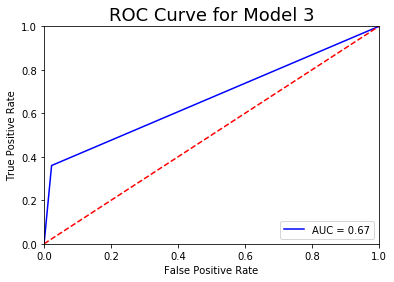

Time taken by Model 3 :  21.952449321746826 seconds


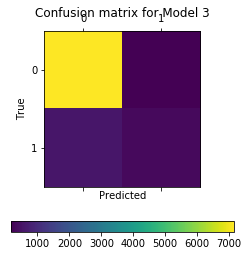

In [36]:
start = time.time()
model3()
end = time.time()
print("Time taken by Model 3 : ",(end - start),"seconds")
training_time_gpu.append((end - start))

In [37]:
training_time_gpu

[9.717464923858643, 9.715609550476074, 21.952449321746826]

## The time mentioned above wil be use to compare with CPU time in Assignment Notebook